In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
df=pd.read_csv("/content/StudentsPerformance.csv")

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
for i in ['math score','reading score'	,'writing score']:
  print(f"the mean of {i} :" ,df[i].mean())
  print(f"the median of {i} :" , df[i].median())
  print(f"the mode of {i} :" , df[i].mode())
  print ("-------------------------------")


the mean of math score : 66.089
the median of math score : 66.0
the mode of math score : 0    65
Name: math score, dtype: int64
-------------------------------
the mean of reading score : 69.169
the median of reading score : 70.0
the mode of reading score : 0    72
Name: reading score, dtype: int64
-------------------------------
the mean of writing score : 68.054
the median of writing score : 69.0
the mode of writing score : 0    74
Name: writing score, dtype: int64
-------------------------------





Observations


 - We have in the 'math score' column : Mean ≈ Median → Symmetrical distribution
 - and in the 'reading score' we have : Mean < Median → Negative skew (left tail)
 - and the column 'writing score' we have as well : Mean ≈ Median → Symmetrical distribution

In [12]:
for i in ['math score','reading score'	,'writing score']:
  print(f"the etendu of {i} :" , df[i].max() - df[i].min())

the etendu of math score : 100
the etendu of reading score : 83
the etendu of writing score : 90


Obsevation :

- All of the columns have a big 'etendu' , that means there's a Great variability among the students


In [13]:
for i in ['math score','reading score'	,'writing score']:
  print(f"the std of {i} : {df[i].std():.2f}")

the std of math score : 15.16
the std of reading score : 14.60
the std of writing score : 15.20


Observation :

- the math score and the writing score have an std >= 15 so there's a High variability (heterogeneous scores)
- the reading score has an std < 15 , so we can say there's a Low variability (but it's almost the same with the other columns)

In [14]:
for i in ['math score','reading score'	,'writing score']:
  print(f"° {i} column :")
  print()
  print(f"- the Q1 of {i} :" , df[i].quantile(0.25))
  print(f"- the Q2 of {i} :" , df[i].quantile(0.5))
  print(f"- the Q3 of {i} :" , df[i].quantile(0.75))
  iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
  print()
  print(f"- the IQR of {i} :", iqr)
  print(f"- the Lower limit of {i} :", df[i].quantile(0.25 ) - 1.5 * iqr)
  print(f"- the upper limit of {i} :", df[i].quantile(0.25 ) + 1.5 * iqr)
  print ("-------------------------------")

° math score column :

- the Q1 of math score : 57.0
- the Q2 of math score : 66.0
- the Q3 of math score : 77.0

- the IQR of math score : 20.0
- the Lower limit of math score : 27.0
- the upper limit of math score : 87.0
-------------------------------
° reading score column :

- the Q1 of reading score : 59.0
- the Q2 of reading score : 70.0
- the Q3 of reading score : 79.0

- the IQR of reading score : 20.0
- the Lower limit of reading score : 29.0
- the upper limit of reading score : 89.0
-------------------------------
° writing score column :

- the Q1 of writing score : 57.75
- the Q2 of writing score : 69.0
- the Q3 of writing score : 79.0

- the IQR of writing score : 21.25
- the Lower limit of writing score : 25.875
- the upper limit of writing score : 89.625
-------------------------------


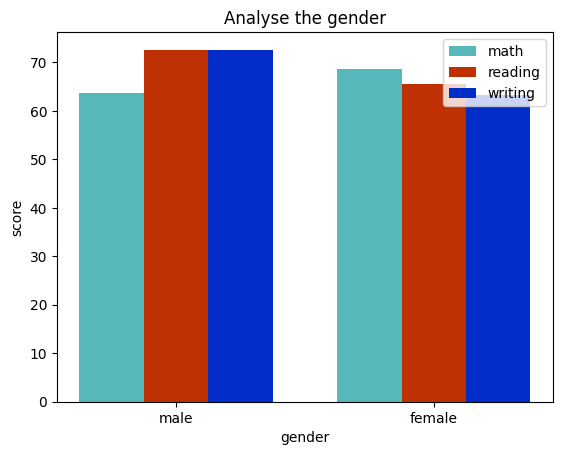

In [15]:
new_data = df.groupby('gender')

math = new_data['math score'].mean()
read = new_data['reading score'].mean()
write = new_data['writing score'].mean()

cat=['male','female']
x = np.arange(len(cat))
width = 0.25

plt.bar(x - width, math, width,label='math',color="#56b8ba")
plt.bar(x ,read, width ,label='reading',color='#bf3004')
plt.bar(x + width, write, width,label='writing',color='#022dc9')

plt.xlabel('gender')
plt.ylabel('score')
plt.title('Analyse the gender')
plt.xticks(x, cat)
plt.legend()
plt.show()

Analyse the scores by the gender

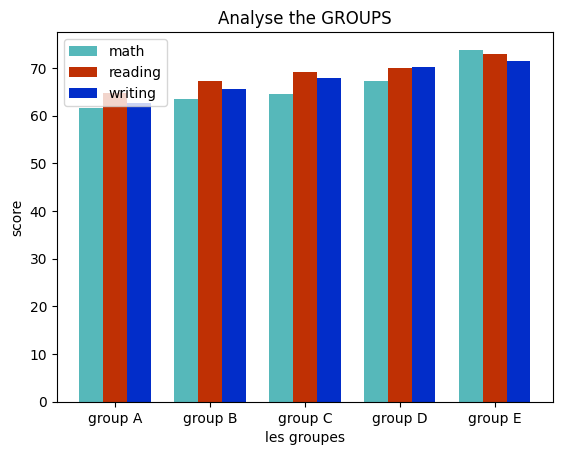

In [16]:
new_data = df.groupby('race/ethnicity')

math = new_data['math score'].mean()
read = new_data['reading score'].mean()
write = new_data['writing score'].mean()

cat=['group A','group B','group C','group D','group E']
x = np.arange(len(cat))
width = 0.25

plt.bar(x - width, math, width,label='math',color="#56b8ba")
plt.bar(x ,read, width ,label='reading',color='#bf3004')
plt.bar(x + width, write, width,label='writing',color='#022dc9')

plt.xlabel('les groupes')
plt.ylabel('score')
plt.title('Analyse the GROUPS')
plt.xticks(x, cat)
plt.legend()
plt.show()

Analyse the scores by the groups

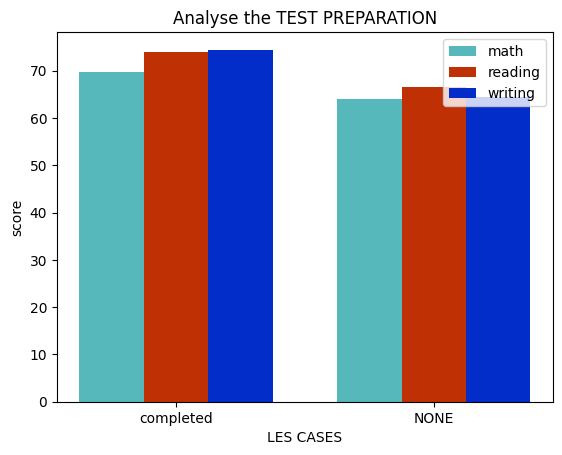

In [17]:
new_data = df.groupby('test preparation course')

math = new_data['math score'].mean()
read = new_data['reading score'].mean()
write = new_data['writing score'].mean()

cat=['completed','NONE']
x = np.arange(len(cat))
width = 0.25

plt.bar(x - width, math, width,label='math',color="#56b8ba")
plt.bar(x ,read, width ,label='reading',color='#bf3004')
plt.bar(x + width, write, width,label='writing',color='#022dc9')

plt.xlabel('LES CASES')
plt.ylabel('score')
plt.title('Analyse the TEST PREPARATION')
plt.xticks(x, cat)
plt.legend()
plt.show()

In [18]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

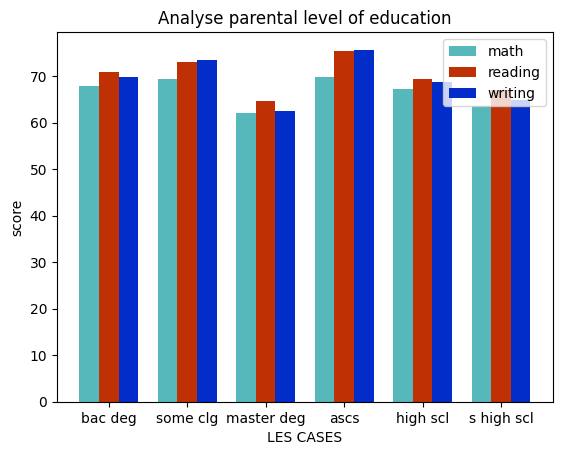

In [54]:
cat = np.array(["bac deg", 'some clg', "master deg",
       "ascs", 'high scl', 's high scl'])
new_data = df.groupby('parental level of education')

math = new_data['math score'].mean()
read = new_data['reading score'].mean()
write = new_data['writing score'].mean()


x = np.arange(len(cat))
width = 0.25

plt.bar(x - width, math, width,label='math',color="#56b8ba")
plt.bar(x ,read, width ,label='reading',color='#bf3004')
plt.bar(x + width, write, width,label='writing',color='#022dc9')

plt.xlabel('LES CASES')
plt.ylabel('score')
plt.title('Analyse parental level of education')
plt.xticks(x, cat)
plt.legend()
plt.show()

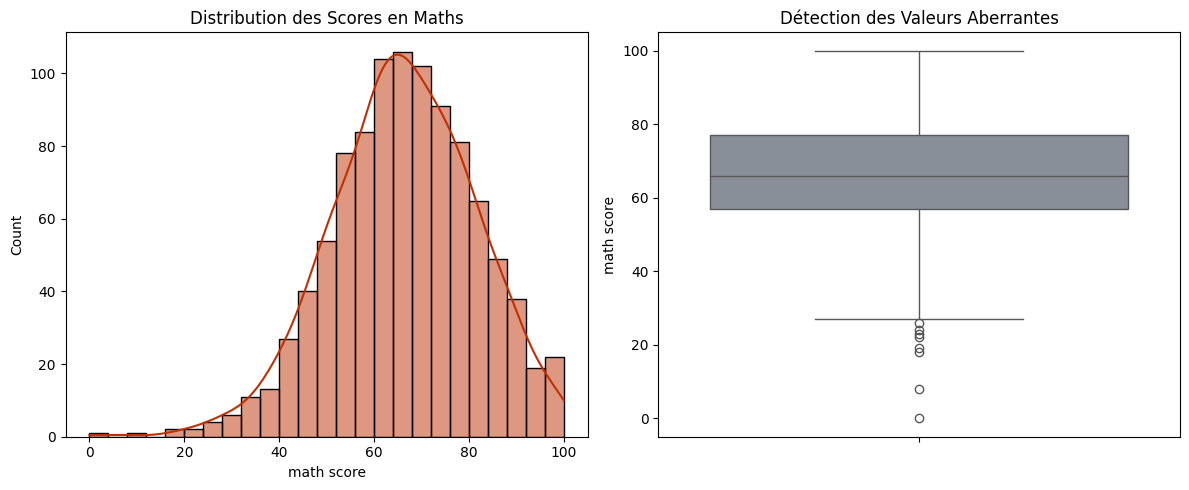

IQR: 20.0 | Limite Inf: 27.0


In [20]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sb.histplot(df['math score'], kde=True, color='#bf3004')
plt.title('Distribution des Scores en Maths')


plt.subplot(1, 2, 2)
sb.boxplot(y=df['math score'], color='#868f9c')
plt.title('Détection des Valeurs Aberrantes')

plt.tight_layout()
plt.show()


Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR: {IQR} | Limite Inf: {Q1 - 1.5*IQR}")